In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('cs-215-assignment-3-multiple-variate-regression/train.csv')
train.drop(columns=['id', 'Row#'], inplace=True)
train

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,25.0,0.50,0.25,0.75,0.63,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.402948,0.409261,31.274591,4418.44126
1,12.5,0.25,0.25,0.25,0.25,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.500438,0.445494,34.467567,5862.80545
2,25.0,0.50,0.25,0.38,0.75,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.509001,0.459421,36.624966,6079.08526
3,12.5,0.25,0.25,0.75,0.75,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.583379,0.498056,40.865478,7400.77538
4,12.5,0.25,0.25,0.50,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.447669,0.423764,33.298861,4858.24073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,12.5,0.25,0.25,0.50,0.63,69.7,42.1,58.2,50.2,24.3,41.2,34.0,0.56,0.335927,0.352186,28.793440,3182.69865
14996,12.5,0.25,0.25,0.38,0.63,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.545095,0.470719,38.042756,5862.80545
14997,12.5,0.25,0.25,0.75,0.50,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.481801,0.442535,35.414082,5569.13925
14998,25.0,0.50,0.38,0.38,0.75,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.552359,0.470847,38.625436,6795.88187


In [3]:
test = pd.read_csv('cs-215-assignment-3-multiple-variate-regression/test.csv')
test.drop(columns=['id', 'Row#'], inplace=True)
test

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,25.0,0.50,0.25,0.38,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.424574,0.417909,31.448420
1,12.5,0.25,0.25,0.63,0.63,69.7,42.1,58.2,50.2,24.3,41.2,16.0,0.26,0.552359,0.476308,38.417394
2,25.0,0.25,0.25,0.25,0.25,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.511413,0.445494,35.487008
3,25.0,0.50,0.38,0.38,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.520637,0.460795,37.712513
4,12.5,0.25,0.25,0.38,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.470593,0.438026,35.824852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,12.5,0.25,0.25,0.38,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.608345,0.509528,42.487539
9996,12.5,0.25,0.25,0.63,0.50,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.362184,0.388822,29.370607
9997,25.0,0.50,0.25,0.38,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.589622,0.487428,40.813181
9998,12.5,0.25,0.25,0.38,0.38,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.593030,0.494895,41.971816


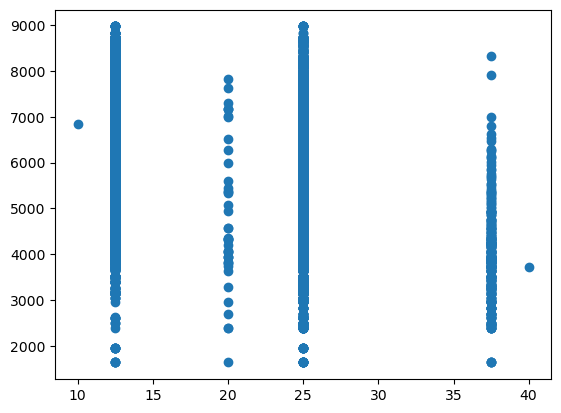

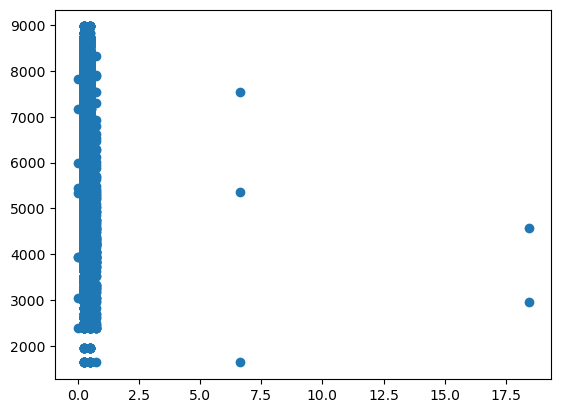

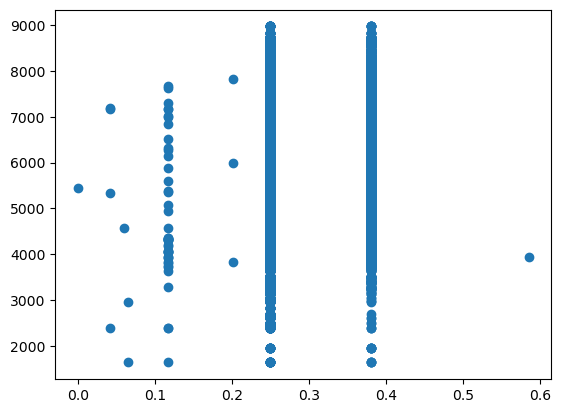

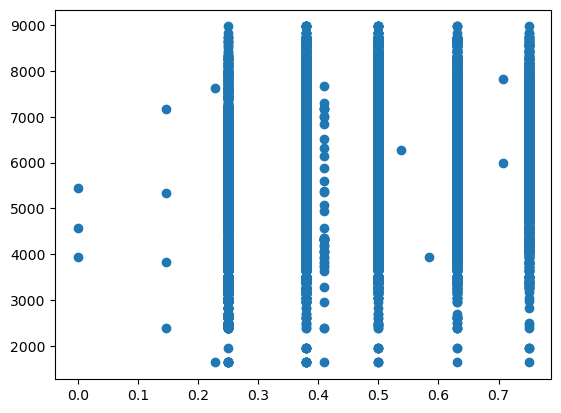

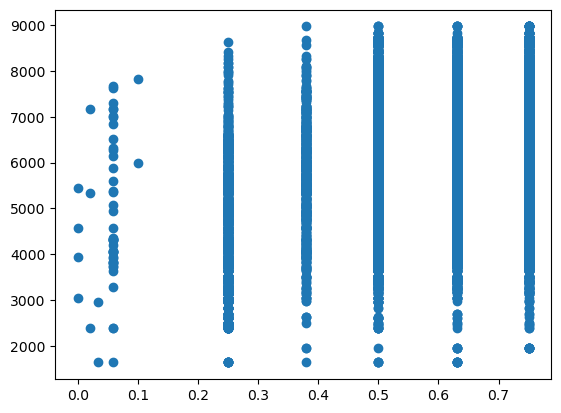

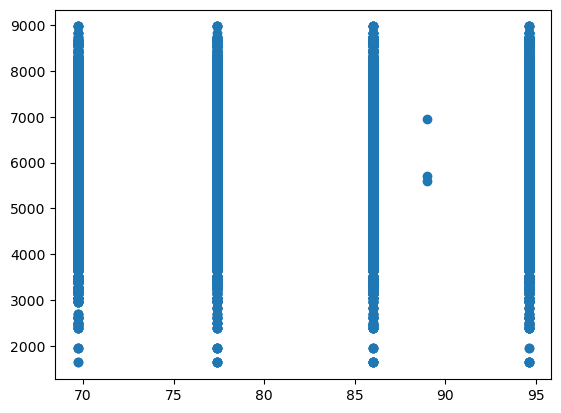

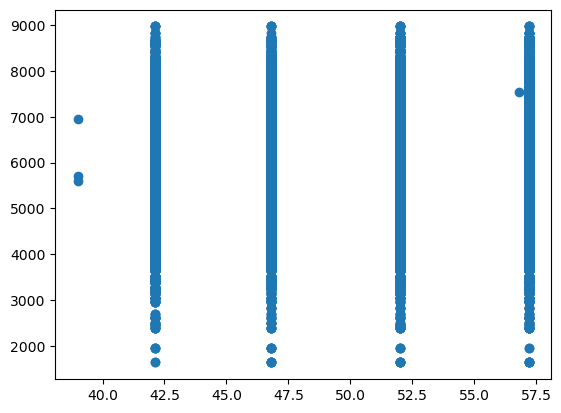

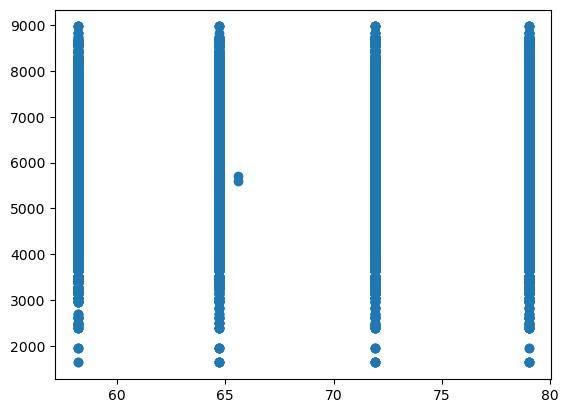

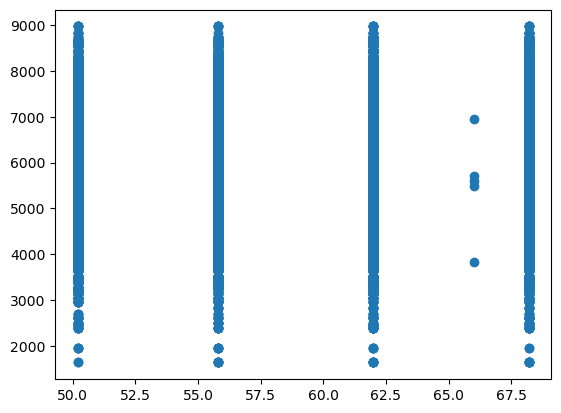

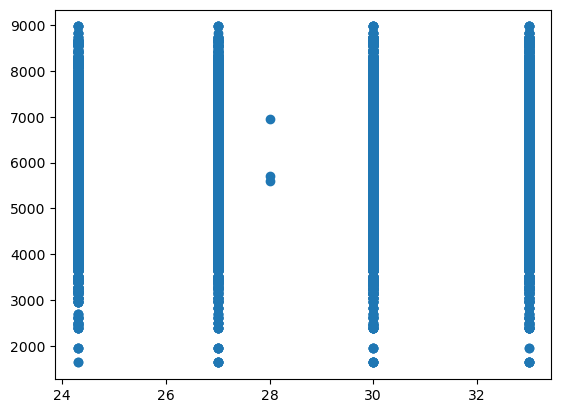

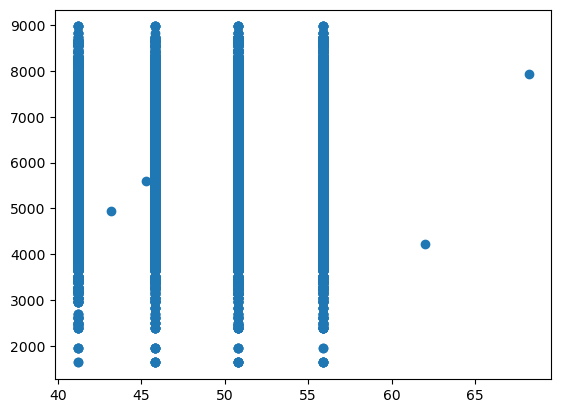

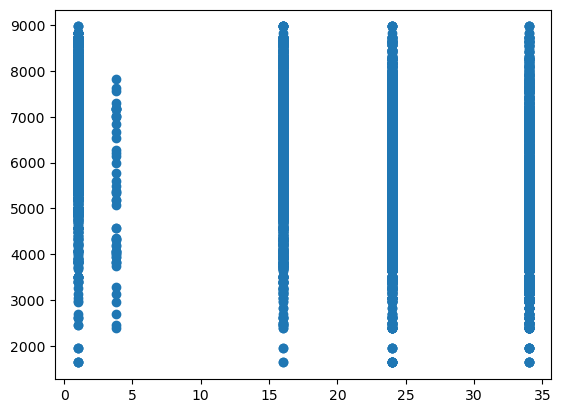

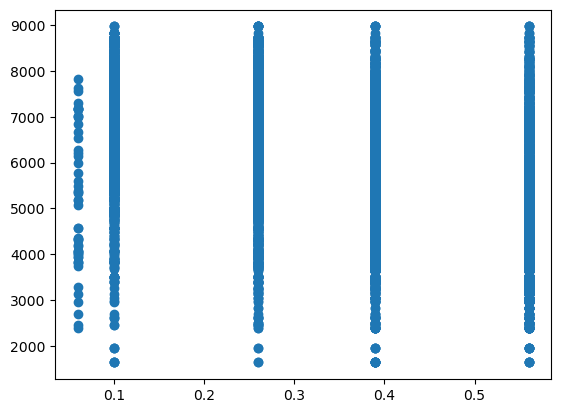

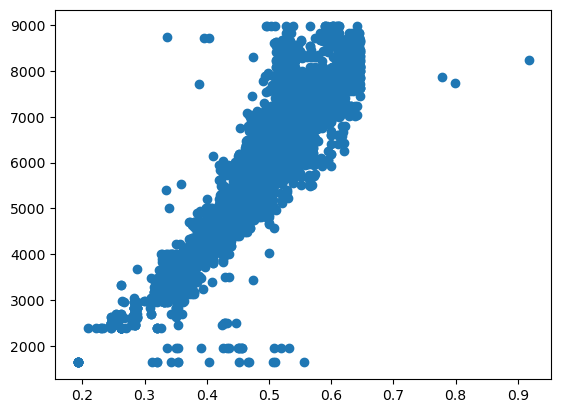

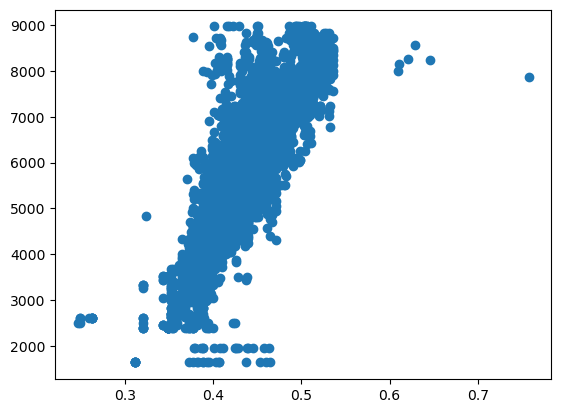

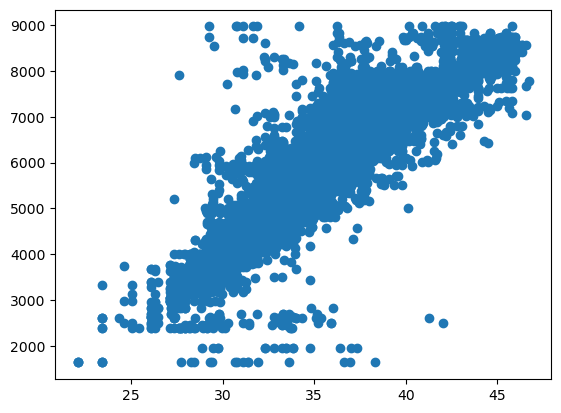

In [4]:
for i in range(0, 16):
	plt.scatter(train.iloc[:, i], train.iloc[:, 16])
	plt.show()

In [5]:
# Standardising the data set
def standardise(data):
	# Standardising the data
	data_mean = data.mean()
	data_std = data.std()
	data = (data - data_mean) / data_std
	return data, data_mean, data_std

train_X, train_mean, train_std = standardise(train.iloc[:, 0:16])
print(train_X)
train_Y = train.iloc[:, 16]
print(train_Y)

       clonesize  honeybee   bumbles   andrena     osmia  MaxOfUpperTRange  \
0       0.794604  0.445172 -0.598939  1.780197  0.280870          1.362867   
1      -1.086679 -0.513981 -0.598939 -1.616856 -2.347806         -0.531203   
2       0.794604  0.445172 -0.598939 -0.733622  1.110979          1.362867   
3      -1.086679 -0.513981 -0.598939  1.780197  1.110979          1.362867   
4      -1.086679 -0.513981 -0.598939  0.081671  0.280870         -0.531203   
...          ...       ...       ...       ...       ...               ...   
14995  -1.086679 -0.513981 -0.598939  0.081671  0.280870         -1.379130   
14996  -1.086679 -0.513981 -0.598939 -0.733622  0.280870         -0.531203   
14997  -1.086679 -0.513981 -0.598939  1.780197 -0.618414         -0.531203   
14998   0.794604  0.445172  1.597778 -0.733622  1.110979          0.415832   
14999  -1.086679 -0.513981 -0.598939  0.081671  1.110979          0.415832   

       MinOfUpperTRange  AverageOfUpperTRange  MaxOfLowerTRange

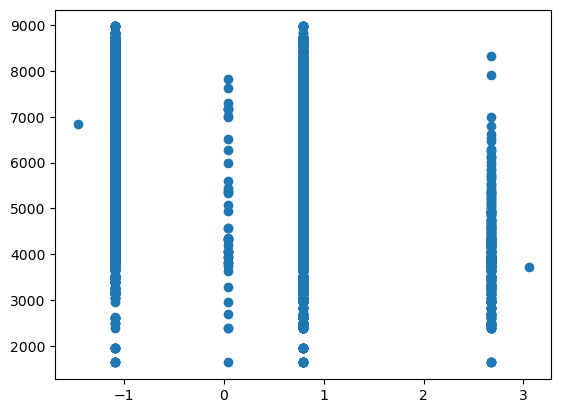

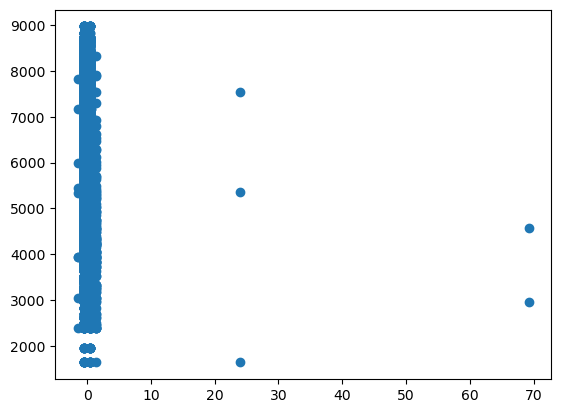

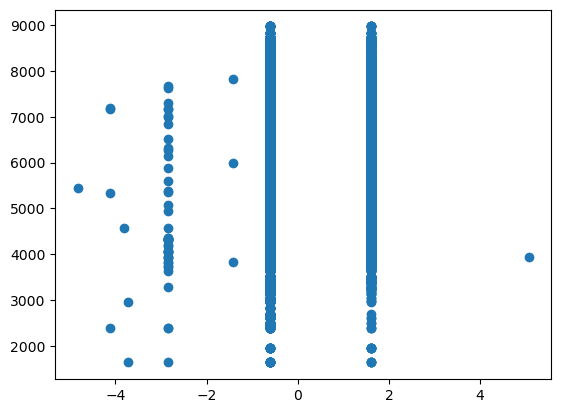

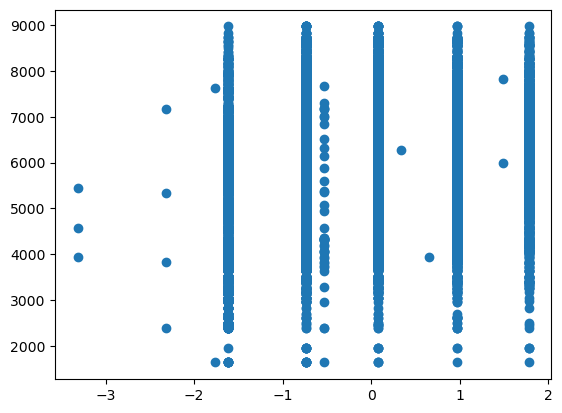

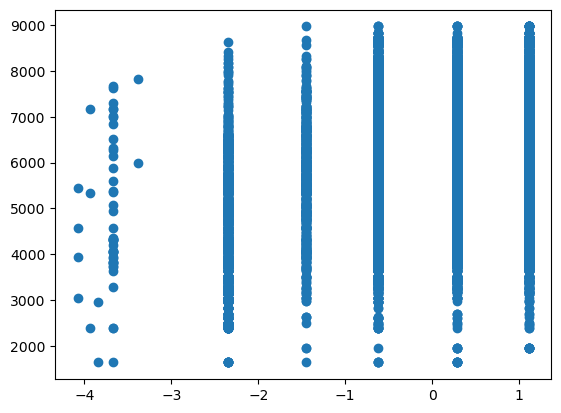

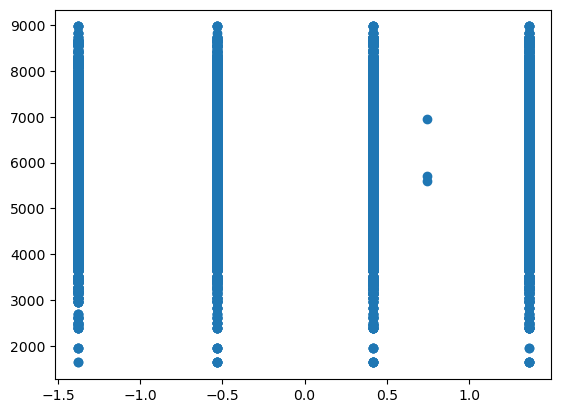

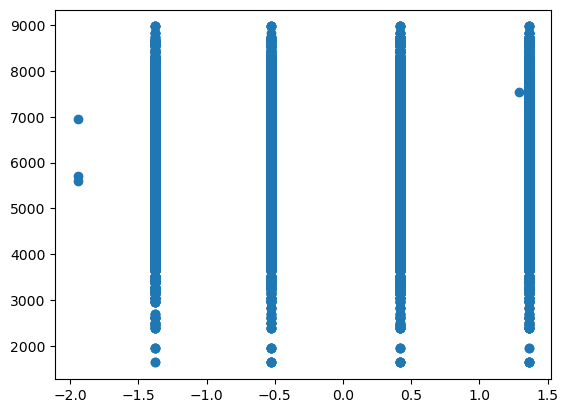

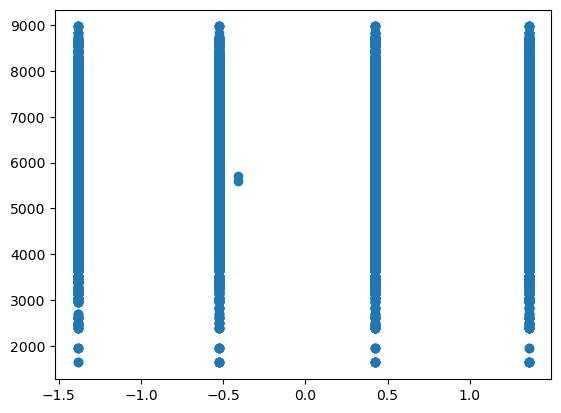

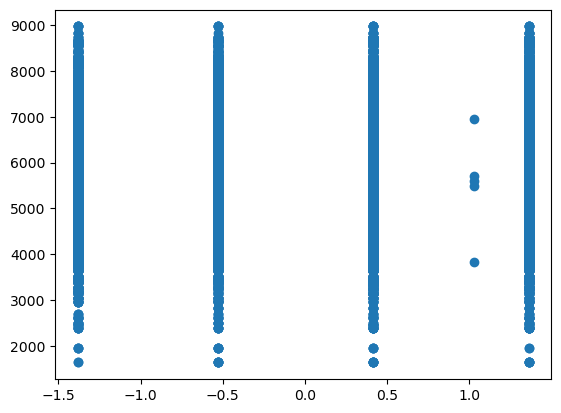

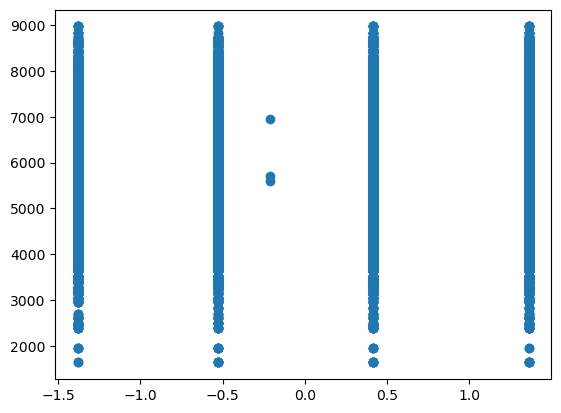

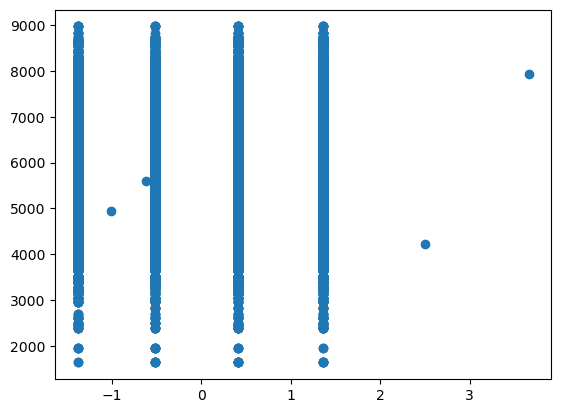

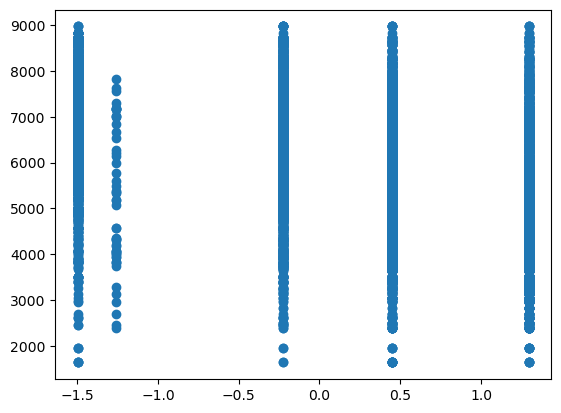

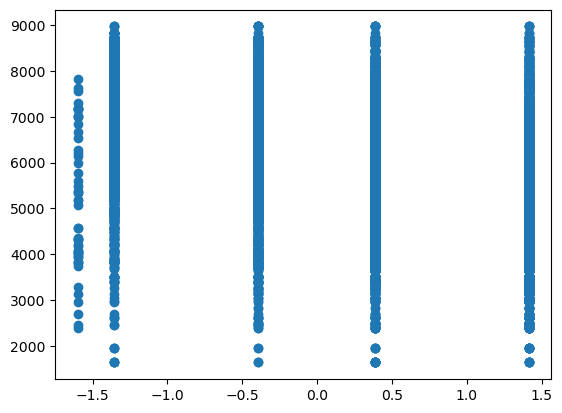

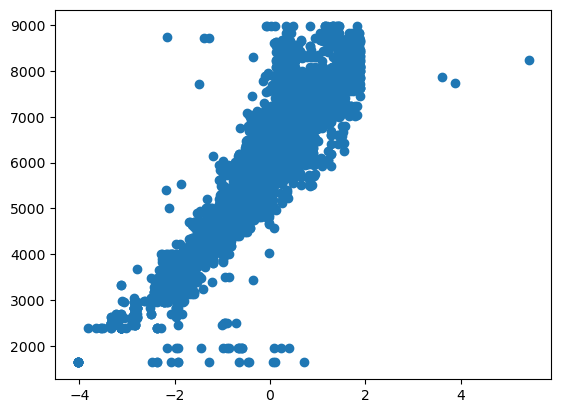

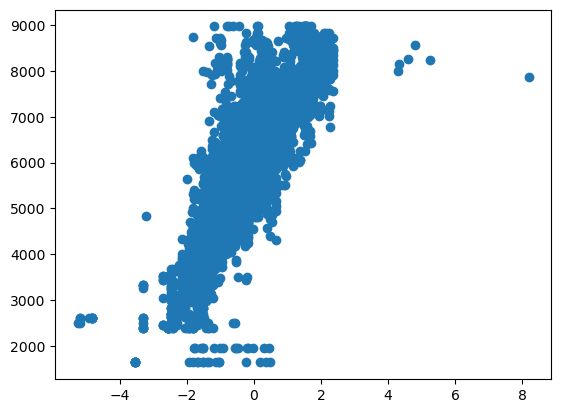

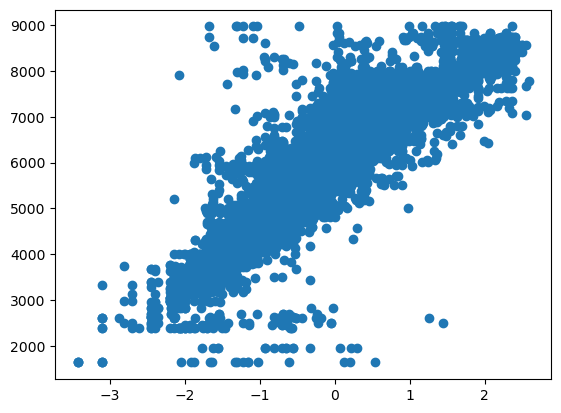

In [6]:
for i in range(0, 16):
	plt.scatter(train_X.iloc[:, i], train_Y)
	plt.show()

In [7]:
def fit(train_x, train_y):
	# Adding a column of ones to the train_x
	train_x = np.c_[np.ones(train_x.shape[0]), train_x]

	# Calculating the coefficients
	coefficients = np.linalg.inv(train_x.T @ train_x) @ train_x.T @ train_y
	return coefficients

coefficients = fit(train_X, train_Y).reshape(-1, 1)
print(coefficients)
print(coefficients.shape)

[[ 6.03358620e+03]
 [-9.29987661e+00]
 [ 8.24661338e-01]
 [ 5.75587610e+00]
 [ 4.17907157e+00]
 [ 1.34081816e+01]
 [ 5.38020341e+04]
 [ 3.04685710e+04]
 [-5.17642284e+03]
 [-1.04960239e+02]
 [-7.89419769e+04]
 [-7.70381866e+01]
 [ 5.66901848e+01]
 [-8.49190604e+01]
 [ 9.81150535e+02]
 [-5.23107279e+01]
 [ 3.48228924e+02]]
(17, 1)


In [8]:
def standardise_test(test, train_mean, train_std):
	# Standardising the data
	test = (test - train_mean) / train_std
	return test

In [9]:
test_X = standardise_test(test.iloc[:, 0:16], train_mean, train_std)
print(test_X)
test_X = np.c_[np.ones(test_X.shape[0]), test_X]
print(test_X)

      clonesize  honeybee   bumbles   andrena     osmia  MaxOfUpperTRange  \
0      0.794604  0.445172 -0.598939 -0.733622  0.280870         -0.531203   
1     -1.086679 -0.513981 -0.598939  0.964905  0.280870         -1.379130   
2      0.794604 -0.513981 -0.598939 -1.616856 -2.347806         -1.379130   
3      0.794604  0.445172  1.597778 -0.733622  0.280870          0.415832   
4     -1.086679 -0.513981 -0.598939 -0.733622 -2.347806          1.362867   
...         ...       ...       ...       ...       ...               ...   
9995  -1.086679 -0.513981 -0.598939 -0.733622  0.280870          0.415832   
9996  -1.086679 -0.513981 -0.598939  0.964905 -0.618414          1.362867   
9997   0.794604  0.445172 -0.598939 -0.733622  0.280870          0.415832   
9998  -1.086679 -0.513981 -0.598939 -0.733622 -1.448522          1.362867   
9999   0.794604  0.445172  1.597778  0.081671  1.110979         -1.379130   

      MinOfUpperTRange  AverageOfUpperTRange  MaxOfLowerTRange  \
0        

In [10]:
test_pred = test_X @ coefficients

In [11]:
test_pred = pd.DataFrame(test_pred, columns=['yield'])
print(test_pred)

            yield
0     4631.507196
1     6992.707290
2     6169.409885
3     6329.811696
4     5603.635384
...           ...
9995  7825.198451
9996  3696.076983
9997  7456.545599
9998  7629.482740
9999  4177.173566

[10000 rows x 1 columns]


In [14]:
def submit(y_pred):
	test = pd.read_csv('cs-215-assignment-3-multiple-variate-regression/test.csv')
	test.drop(columns=['Row#', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia', 'MinOfUpperTRange', 'MinOfLowerTRange', 'MaxOfUpperTRange', 'MaxOfLowerTRange', 'AverageOfUpperTRange', 'AverageOfLowerTRange', 'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds'], inplace=True)
	test['yield'] = y_pred
	return test

In [15]:
submit(test_pred).to_csv('submission.csv', index=False)